# Introduction
- wildqat を使って クラスタリングを行ってみる
- 簡単のため、クラスタ数は2で行う

# Let's import everything I nead :)

In [1]:
import wildqat as wq
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# How To
- wildqatにQUBOを投げる準備として、損失関数を構築する必要がある
- 今回は損失関数を以下のように定義した
    - `異なるクラスタ間のエッジの長さの総和が最大のとき最小値をとる`

$$
E_0 = \sum_{i=1}^{N}\sum_{j=1}^{N} L(i,j) (q_i - q_j)^2
$$

あとはいい感じにする

$$
E_0 = \sum_{i=1}^{N} \left \{ - \sum_j ^N L(i,j) \right \} q_i + \sum_{i<j}^{N} \left \{2 L(i,j) \right \} q_i q_j
$$

# Preparation

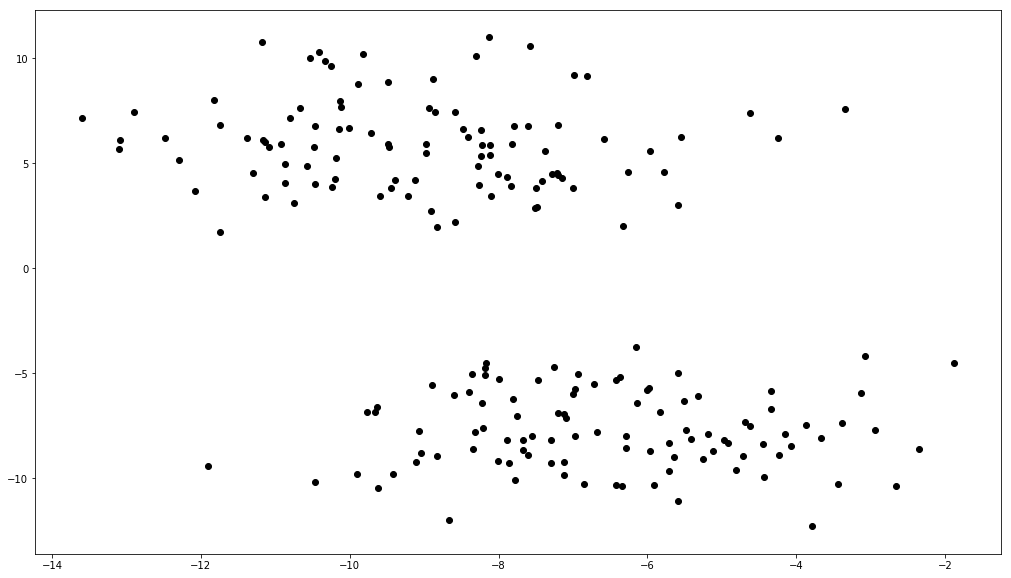

In [18]:
X, Y = make_blobs(n_samples=200, 
                  n_features=2, 
                  cluster_std=2,
                  centers=2)

sample = X
# sample = [[0,0], [0,1], [np.sqrt(3),0]]
# sample = [[0,0], [0,1], [3,3], [4,1], [1,2], [3,1], [0.5,0.5], [3.5,2]]


fig, ax = plt.subplots(figsize=(10*1.73, 10))
for point in sample:
    x = point[0]
    y = point[1]
    ax.scatter(x, y, color='black')

In [19]:
def L(sample, i, j):
    p1 = sample[i]
    p1x = p1[0]
    p1y = p1[1]
    p2 = sample[j]
    p2x = p2[0]
    p2y = p2[1]
    
    length = np.sqrt((p2x-p1x)**2 + (p2y-p1y)**2)
    return length
    

In [20]:
L(sample, 0,2)

19.761874273604846

# Calculation

In [21]:
a = wq.opt()
N = len(sample)
a.qubo = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            Lsum = sum([ L(sample, i, _j) for _j in range(N) ])
            a.qubo[i][i] = - Lsum
        elif i<j:
#             a.qubo[i][j]=2*numbers[i] * numbers[j] + alpha*2
            a.qubo[i][j] = 2 * L(sample, i, j)

for _ in range(1):
    answer = np.array(a.sa())
    print('answer: ', answer)
    E0 = 0
    for i in range(N):
        for j in range(N):
#             print('valu', L(sample, i, j), answer[i], answer[j])
            E0 +=  -L(sample, i, j) * (answer[i] - answer[j])**2
    print(E0)
    print('-----------')

answer:  [1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0
 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0
 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0
 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0
 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0]
-283133.9908486351
-----------


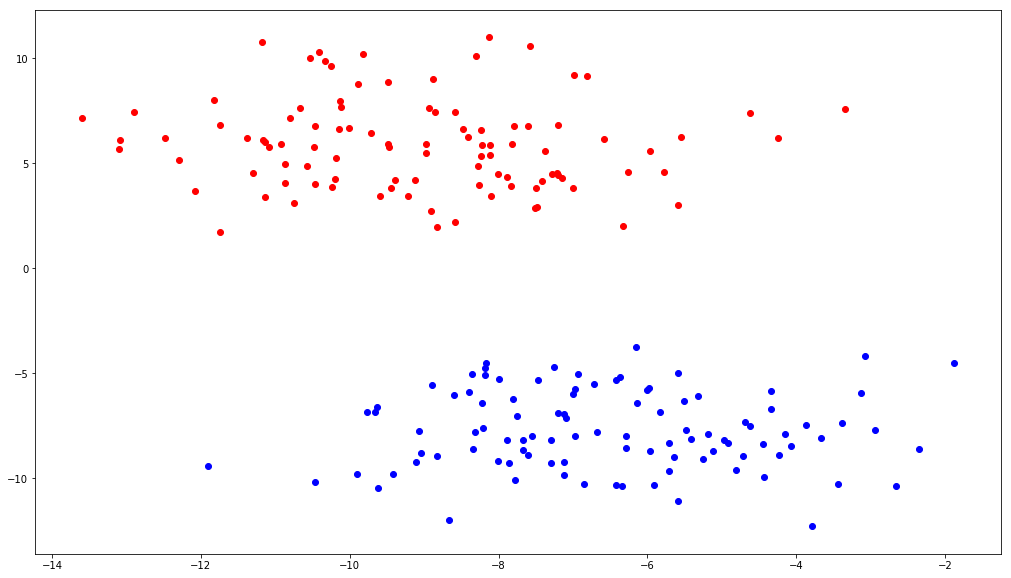

In [22]:
# fig, ax = plt.subplots(figsize=(10, 10))
fig, ax = plt.subplots(figsize=(10*1.73, 10))
for i, point in enumerate(sample):
    x = point[0]
    y = point[1]
    if answer[i] == 0:
        ax.scatter(x, y, color='red')
    elif answer[i] == 1:
        ax.scatter(x, y, color='blue')